In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree,metrics

In [22]:
data = pd.read_excel('Case1_data.xlsx')
data.to_csv(r'Data_case1.csv', index = False)

In [48]:
np.unique(data['LoadFactor'])

array([0.        , 0.00333333, 0.00359712, ..., 1.3027027 , 1.3125    ,
       1.4751773 ])

In [ ]:
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute)

In [55]:
Time_dic={'date':[],'value':list(data['LoadFactor'])}
for year,load in zip(data['ScheduleTime'],data['LoadFactor']):
    t=str(a.year)
    if len(str(a.month))==1:
        t+='0'+str(a.month)
    else:
        t+=str(a.month)
    if len(str(a.day))==1:
        t+='0'+str(a.day)
    else:
        t+=str(a.day)
    t+='T'
    if len(str(a.hour))==1:
        t+='0'+str(a.hour)
    else:
        t+=str(a.hour)
    if len(str(a.minute))==1:
        t+='0'+str(a.minute)
    else:
        t+=str(a.minute)
    t+='00Z'
    Time_dic['date'].append(t)
    
df_time=pd.DataFrame.from_dict(Time_dic)
df_time.to_csv(r'Time_Case1.csv', index = False)

In [92]:
data['ScheduleTime'][0].quarter

1

Plot Load Factor per day

In [105]:
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[],'Day_Of_Year':[],'Day_Of_Week':[],
               'Is_month_end':[],'Is_month_start':[],'Quarter_end':[],'Quarter_start':[],'Year_end':[],
               'Year_Start':[],'Quarter':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute);
    DateTime_dic['Day_Of_Year'].append(a.dayofyear);DateTime_dic['Day_Of_Week'].append(a.dayofweek);
    DateTime_dic['Is_month_end'].append(int(a.is_month_end));
    DateTime_dic['Is_month_start'].append(int(a.is_month_start));
    DateTime_dic['Quarter_end'].append(int(a.is_quarter_end));
    DateTime_dic['Quarter_start'].append(int(a.is_quarter_start));
    DateTime_dic['Year_end'].append(int(a.is_year_end));DateTime_dic['Year_Start'].append(int(a.is_year_start));
    DateTime_dic['Quarter'].append(a.quarter)
    
df_time=pd.DataFrame.from_dict(DateTime_dic)
df_time=df_time.drop(columns=['Day'])
df_time

,Month,Year,Hour,Minute,Day_Of_Year,Day_Of_Week,Is_month_end,Is_month_start,Quarter_end,Quarter_start,Year_end,Year_Start,Quarter
0,1,2021,6,35,1,4,0,1,0,1,0,1,1
1,1,2021,10,35,1,4,0,1,0,1,0,1,1
2,1,2021,12,5,1,4,0,1,0,1,0,1,1
3,1,2021,13,20,1,4,0,1,0,1,0,1,1
4,1,2021,14,20,1,4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,2,2022,18,30,39,1,0,0,0,0,0,0,1
36766,2,2022,19,30,39,1,0,0,0,0,0,0,1
36767,2,2022,19,40,39,1,0,0,0,0,0,0,1
36768,2,2022,19,5,39,1,0,0,0,0,0,0,1


In [127]:
df_time.iloc[:,6:12]

,Is_month_end,Is_month_start,Quarter_end,Quarter_start,Year_end,Year_Start
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
36765,0,0,0,0,0,0
36766,0,0,0,0,0,0
36767,0,0,0,0,0,0
36768,0,0,0,0,0,0


In [122]:
apply_OneHotEncoder(df_time[['Year']])

,2021,2022
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36765,0.0,1.0
36766,0.0,1.0
36767,0.0,1.0
36768,0.0,1.0


In [121]:
def apply_OneHotEncoder(data_col):
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(data_col).toarray())
    d={}
    for i in range (0,len(np.unique(data_col))):
        d[i]=enc.categories_[0][i]
    enc_df=enc_df.rename(columns=d)
    return enc_df

apply_OneHotEncoder(df_time[['Month']])

,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36766,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
type(df_time[['Month']])

pandas.core.frame.DataFrame

In [114]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df6 = pd.DataFrame(enc.fit_transform(df_time[['Month']]).toarray())
d={}
for i in range (0,len(np.unique(df_time.Month))):
    d[i]=enc.categories_[0][i]
enc_df6=enc_df6.rename(columns=d)
enc_df6

,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36766,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df7 = pd.DataFrame(enc.fit_transform(df_time[['Month']]).toarray())
d={}
for i in range (0,len(np.unique(df_time.Month))):
    d[i]=enc.categories_[0][i]
enc_df7=enc_df7.rename(columns=d)

In [99]:
len(DateTime_dic['Day'])

36770

In [81]:
data.groupby('ScheduleTime').mean()

,FlightNumber,SeatCapacity,LoadFactor
ScheduleTime,,,
2021-01-01 06:05:00,2707.0,189.0,0.026455
2021-01-01 06:35:00,874.0,142.0,0.408451
2021-01-01 08:20:00,2831.0,186.0,0.139785
2021-01-01 10:35:00,818.0,74.0,0.189189
2021-01-01 12:05:00,876.0,142.0,0.570423
...,...,...,...
2022-02-08 21:40:00,1496.0,197.0,0.406091
2022-02-08 22:00:00,2396.0,180.0,0.577778
2022-02-08 22:40:00,2961.0,200.0,0.265000


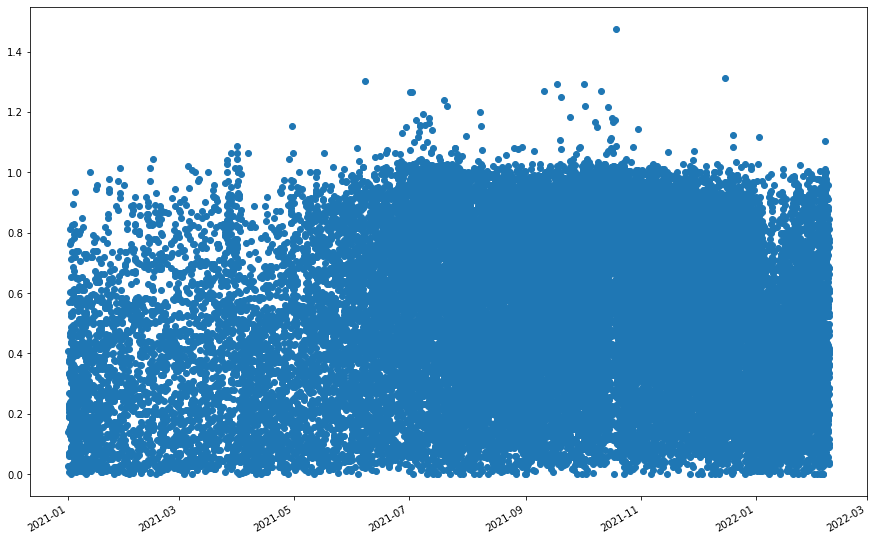

In [71]:
# plot
plt.figure(figsize=(15,10))
plt.scatter(data.ScheduleTime,data.LoadFactor)
# beautify the x-labels
plt.gcf().autofmt_xdate()

---

In [130]:
data = pd.read_excel('Case1_data.xlsx')
data=data.drop(columns=['FlightNumber'])
is_NaN = data.isnull();row_has_NaN = is_NaN.any(axis=1);rows_with_NaN = data[row_has_NaN]
data = data.drop(list(rows_with_NaN.index))
data=data.reset_index()
data.AircraftType=data.AircraftType.astype('str')
apply_OneHotEncoder(data[['Airline']])

,AY,BJ,BT,BZ,CL,CN,DO,DT,DU,EM,...,YJ,YQ,YT,YU,ZB,ZD,ZL,ZP,ZT,ZY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
apply_OneHotEncoder(data[['Destination']])

,AFW,AHT,AIV,AIY,ALX,AMN,AMS,APH,ARB,ASE,...,YYT,YYW,YYZ,YZF,YZM,YZV,ZBF,ZNG,ZSW,ZTM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
pd.concat([apply_OneHotEncoder(data[['Airline']]),apply_OneHotEncoder(data[['Destination']])],axis=1)

,AY,BJ,BT,BZ,CL,CN,DO,DT,DU,EM,...,YYT,YYW,YYZ,YZF,YZM,YZV,ZBF,ZNG,ZSW,ZTM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data = pd.read_excel('Case1_data.xlsx')
data=data.drop(columns=['FlightNumber'])
is_NaN = data.isnull();row_has_NaN = is_NaN.any(axis=1);rows_with_NaN = data[row_has_NaN]
data = data.drop(list(rows_with_NaN.index))
data=data.reset_index()
data.AircraftType=data.AircraftType.astype('str')
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['Airline']]).toarray())
airline_d={}
for i in range (0,len(np.unique(data.Airline))):
    airline_d[i]=enc.categories_[0][i]
enc_df=enc_df.rename(columns=airline_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = pd.DataFrame(enc.fit_transform(data[['Destination']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Destination))):
    destination_d[i]=enc.categories_[0][i]
enc_df2=enc_df2.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df3 = pd.DataFrame(enc.fit_transform(data[['AircraftType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.AircraftType))):
    destination_d[i]=enc.categories_[0][i]
enc_df3=enc_df3.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df4 = pd.DataFrame(enc.fit_transform(data[['FlightType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.FlightType))):
    destination_d[i]=enc.categories_[0][i]
enc_df4=enc_df4.rename(columns=destination_d)
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df5 = pd.DataFrame(enc.fit_transform(data[['Sector']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Sector))):
    destination_d[i]=enc.categories_[0][i]
enc_df5=enc_df5.rename(columns=destination_d)
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute)
    
pd_time=pd.DataFrame.from_dict(DateTime_dic)
#data=data.drop(columns=['index','ScheduleTime','Airline','Destination','AircraftType','FlightType','Sector'])
#y=np.array(data.LoadFactor)
#data=data.drop(columns='LoadFactor')
df = pd.concat([enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data], axis = 1)
df.to_csv(r'Data_case1.csv', index = False)
df

,AY,BJ,BT,BZ,CL,CN,DO,DT,DU,EM,...,Minute,index,ScheduleTime,Airline,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35,0,2021-01-01 06:35:00,IA,DEN,73W,J,US,142,0.408451
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35,1,2021-01-01 10:35:00,JZ,YHM,AT7,J,CA,74,0.189189
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,2,2021-01-01 12:05:00,IA,DEN,73W,J,US,142,0.570423
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,20,3,2021-01-01 13:20:00,CN,EST,AT7,J,US,72,0.333333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,4,2021-01-01 14:20:00,LJ,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30,36765,2022-02-08 18:30:00,VW,YYZ,320,J,CA,180,0.522222
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30,36766,2022-02-08 19:30:00,LJ,YQU,319,J,CA,156,0.532051
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,36767,2022-02-08 19:40:00,LJ,YUL,319,J,CA,156,0.602564
36766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5,36768,2022-02-08 19:05:00,CL,DAN,73H,J,US,189,0.417989


In [16]:
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute)

Visualize load factor

In [20]:
for a in data['ScheduleTime']:
    print(a.day)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13


27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
2

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
2

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3


24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
3

1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [12]:
np.unique(pd_time.Day)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

Let's try to add more features that might be rellevant to predict the load factor.
- Weekend: Binary variable with a 1 if the day belongs to Friday after 12 pm until Monday until 

In [ ]:
X=np.array(df)
# NORMALIZATION
X_pre = X - np.mean(X,axis=0)
normalizer = preproc.Normalizer().fit(X_pre.T)  
X_pre = normalizer.transform(X_pre.T).T
min_max_scaler = preproc.MinMaxScaler()
y_pre = min_max_scaler.fit_transform(y.reshape(-1,1)).reshape(-1,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.30, random_state=42)

In [6]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
y_pred=model.predict(X_test)

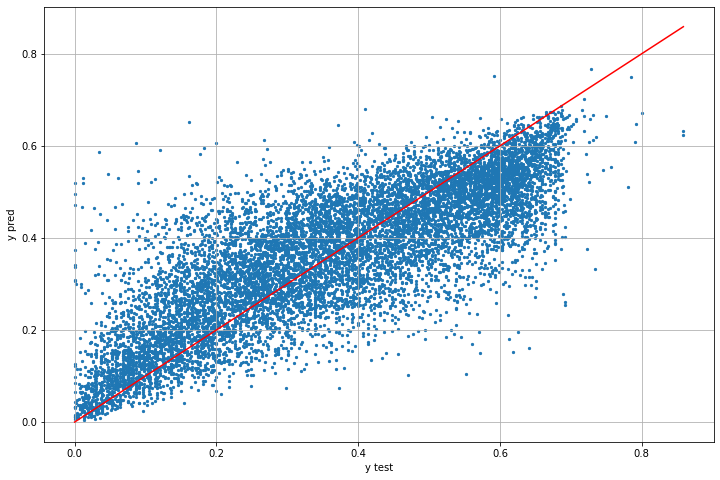

In [8]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,y_pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [9]:
metrics.mean_absolute_error(y_test,y_pred)

0.08457685216223902